## Impoting the library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## import dataset

In [8]:
dataset=pd.read_csv('Position_Salaries.csv')

In [9]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [11]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [15]:
y=y.reshape(len(y),1)

In [16]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## feature scaling


In [18]:
from sklearn.preprocessing import StandardScaler

sc_X=StandardScaler()
sc_Y=StandardScaler()
X=sc_X.fit_transform(x)
Y=sc_Y.fit_transform(y)

In [19]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [20]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training Model

In [21]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')

In [22]:
regressor.fit(X,Y)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## predict a new result

In [27]:
t=regressor.predict(sc_X.transform([[6.5]]))
k=sc_Y.inverse_transform(t)
k

array([170370.0204065])

## visualizing the svr 

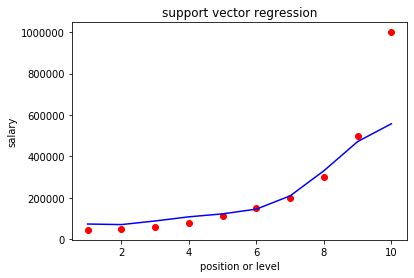

In [31]:
plt.scatter(x,y,color='red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(regressor.predict(X)),color='blue')
plt.title("support vector regression")
plt.xlabel("position or level")
plt.ylabel("salary")
plt.show()